In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yahist

from utils.analysis import Validation

plt.rcParams.update({
    "figure.facecolor":  (1,1,1,0),  # red   with alpha = 30%
#     "axes.facecolor":    (1,1,1,0),  # green with alpha = 50%
#     "savefig.facecolor": (1,1,1,0),  # blue  with alpha = 20%
})

TAG = "pku"

In [2]:
presort_babies = sorted(glob.glob(f"../analysis/studies/vbswh/output_{TAG}/Run2/*.root"))
presort_babies = [baby for baby in presort_babies if "VBSWH_mkW" not in baby]
babies = []
for baby in sorted(presort_babies, reverse=True):
    if "EWK" in baby.split("/")[-1]:
        babies.append(baby)
    else:
        babies.insert(0, baby)
babies

['../analysis/studies/vbswh/output_pku/Run2/Bosons.root',
 '../analysis/studies/vbswh/output_pku/Run2/SingleTop.root',
 '../analysis/studies/vbswh/output_pku/Run2/TTX.root',
 '../analysis/studies/vbswh/output_pku/Run2/TTbar1L.root',
 '../analysis/studies/vbswh/output_pku/Run2/TTbar2L.root',
 '../analysis/studies/vbswh/output_pku/Run2/VH.root',
 '../analysis/studies/vbswh/output_pku/Run2/WJets.root',
 '../analysis/studies/vbswh/output_pku/Run2/data.root',
 '../analysis/studies/vbswh/output_pku/Run2/EWKWLep.root']

In [3]:
# babies.remove("../analysis/studies/vbswh/output_ewkcheck_nofix/Run2/EWKWLep.root")
# babies.remove("../analysis/studies/vbswh/output_ewkcheck_nofix/Run2/EWKVOther.root")

In [4]:
vbswh = Validation(
    bkg_root_files=[baby for baby in babies if "data" not in baby],
    data_root_files=[baby for baby in babies if "data" in baby],
    ttree_name="tree",
    weight_columns=["xsec_sf", "lep_sf", "btag_sf"],
    plots_dir=f"/home/users/jguiang/public_html/onelep_plots/{TAG}/val"
)
vbswh.df["presel_noVBS_noBVeto"] = vbswh.df.eval(
    "hbbjet_score > 0.3"
)
vbswh.df["presel_noVBS"] = vbswh.df.eval(
    "passes_bveto and hbbjet_score > 0.3"
)
vbswh.df["presel_noDetaJJ"] = vbswh.df.eval(
    "passes_bveto and M_jj > 500 and hbbjet_score > 0.3"
)
vbswh.df["presel"] = vbswh.df.eval(
    "passes_bveto and M_jj > 500 and abs(deta_jj) > 3 and hbbjet_score > 0.3"
)

vbswh.df["regionA"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) > 4 and hbbjet_msoftdrop >= 150"
)
vbswh.df["regionB"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) <= 4 and hbbjet_msoftdrop >= 150"
)
vbswh.df["regionC"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) <= 4 and hbbjet_msoftdrop < 150"
)
# vbswh.make_selection("passes_bveto == True")
# vbswh.make_selection(
#     "M_jj > 1500 and abs(deta_jj) > 4 and passes_bveto and ST > 1200 and hbbjet_msoftdrop > 150 and hbbjet_score < 0.9"
# )
# vbswh.make_selection(
#     "passes_bveto and hbbjet_score < 0.9"
# )
# vbswh.make_selection("passes_bveto != True")

In [5]:
np.sum(vbswh.df.btag_sf > 1)

1460142

In [6]:
np.sum(vbswh.df.btag_sf <= 1)

4274844

In [7]:
np.sum(vbswh.df.btag_sf > 1)

1460142

In [8]:
np.sum(vbswh.df.btag_sf <= 1)

4274844

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/hbbjet_score_data_vs_mc_presel_noDetaJJ_and_abs(deta_jj)_leq_3.png


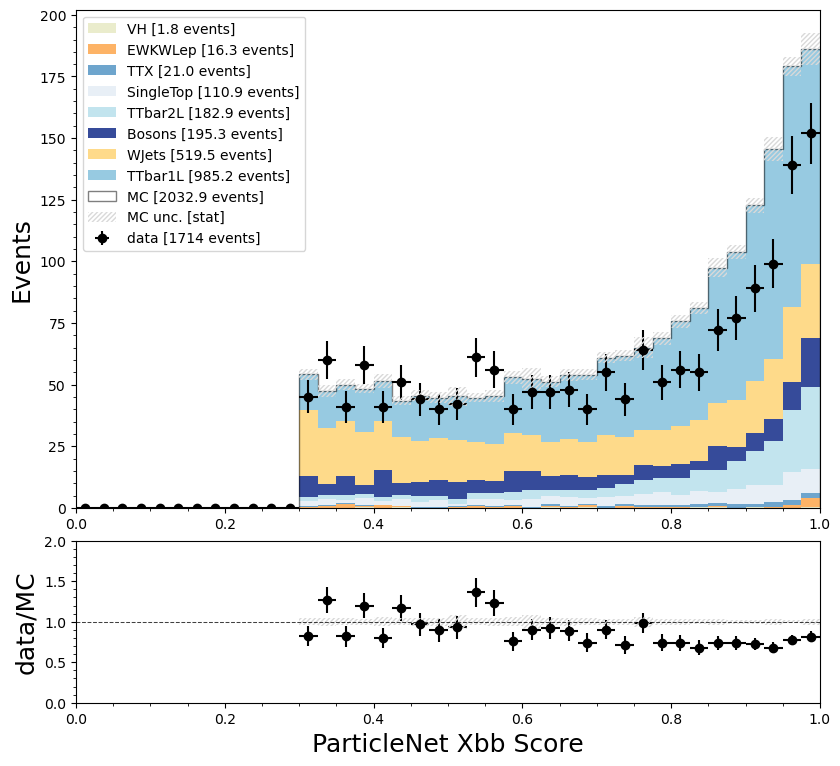

In [9]:
axes, _ = vbswh.plot_data_vs_mc(
    "hbbjet_score", np.linspace(0, 1, 41), 
    selection="presel_noDetaJJ and abs(deta_jj) <= 3",
    x_label="ParticleNet Xbb Score",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);
axes.legend(loc=2, fontsize=10)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/hbbjet_msoftdrop_data_vs_mc_presel_noDetaJJ_and_abs(deta_jj)_leq_3.png


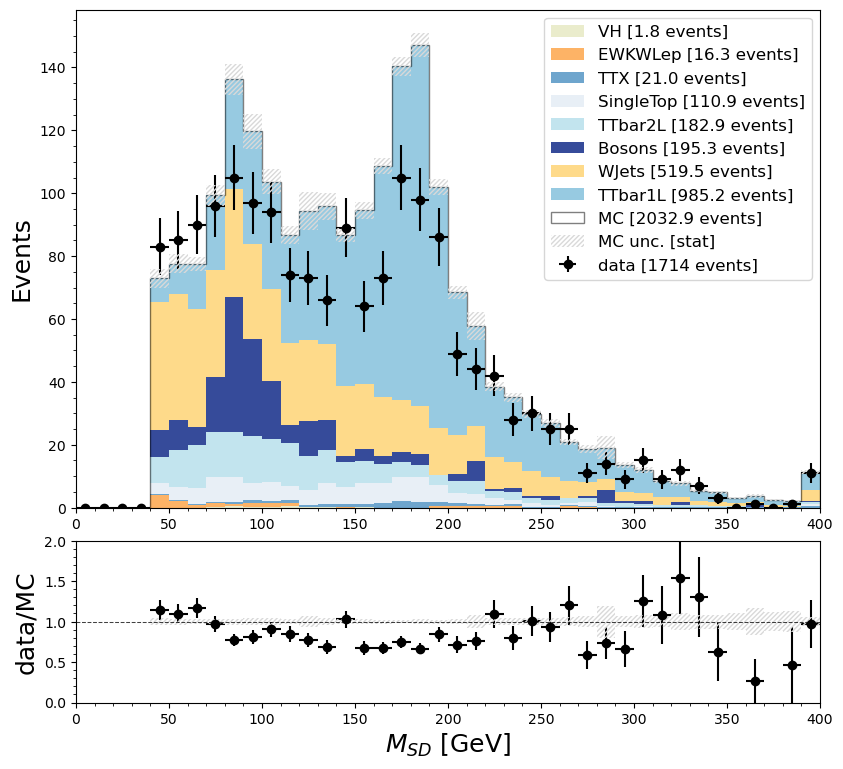

In [10]:
axes, _ = vbswh.plot_data_vs_mc(
    "hbbjet_msoftdrop", np.linspace(0, 400, 41), 
    selection="presel_noDetaJJ and abs(deta_jj) <= 3",
    x_label="$M_{SD}$ [GeV]",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/M_jj_data_vs_mc_regionB_and_ST_gt_1500.png


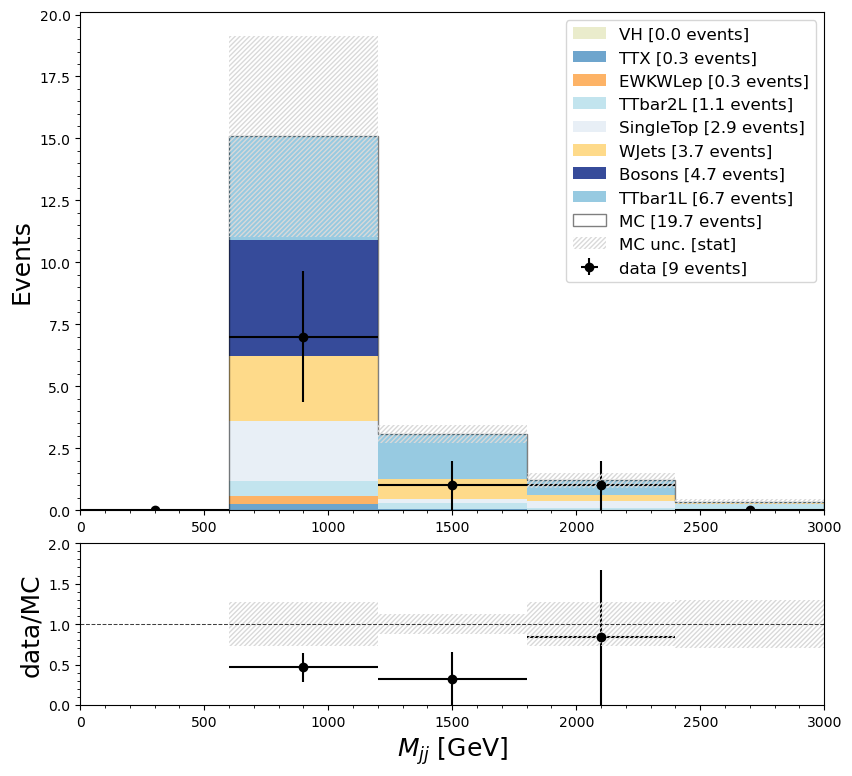

In [11]:
hist_axes, ratio_axes = vbswh.plot_data_vs_mc(
    "M_jj", bins=np.linspace(0, 3000, 6), 
    selection="regionB and ST > 1500",
    x_label=r"$M_{jj}$ [GeV]",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/ST_data_vs_mc_regionC.png


(0.0, 2.0)

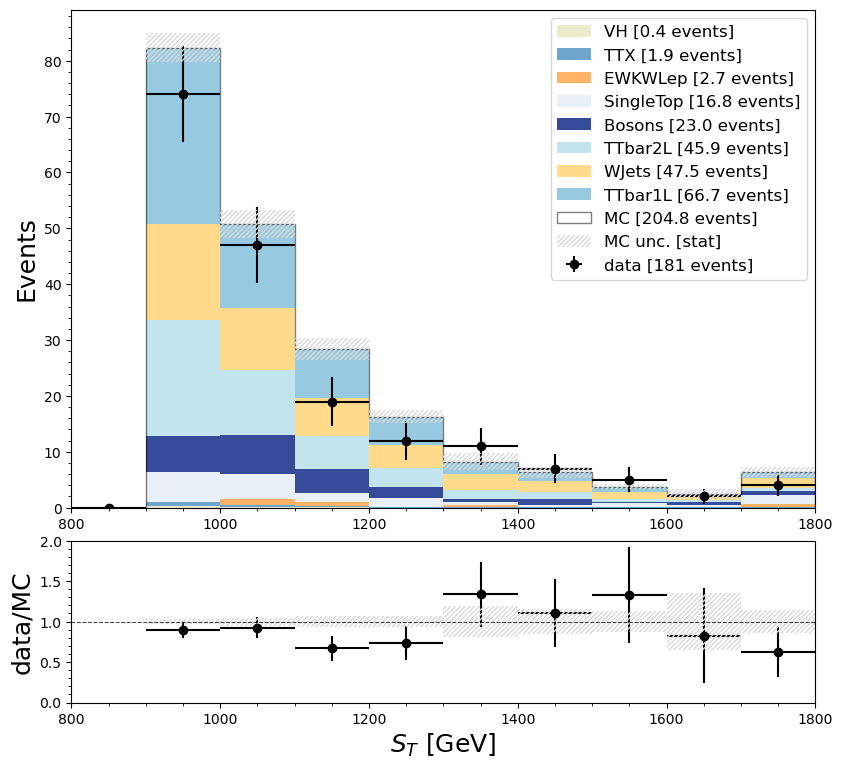

In [29]:
hist_axes, ratio_axes = vbswh.plot_data_vs_mc(
    "ST", bins=np.linspace(800, 1800, 11), 
    selection="regionC",
    x_label=r"$S_T$ [GeV]",
#     norm=True,
    stacked=True
)
ratio_axes.set_ylim([0., 2.0])

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/M_jj_data_vs_mc_regionA.png


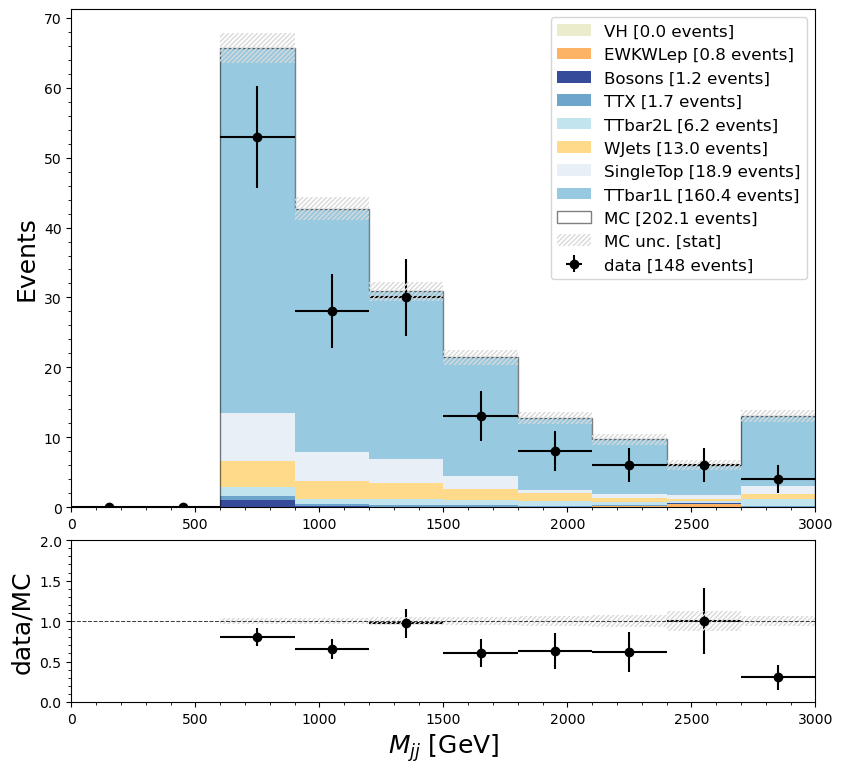

In [13]:
axes, _ = vbswh.plot_data_vs_mc(
    "M_jj", bins=np.linspace(0, 3000, 11), 
    selection="regionA",
    x_label=r"$M_{jj}$ [GeV]",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/deta_jj_data_vs_mc_regionA.png


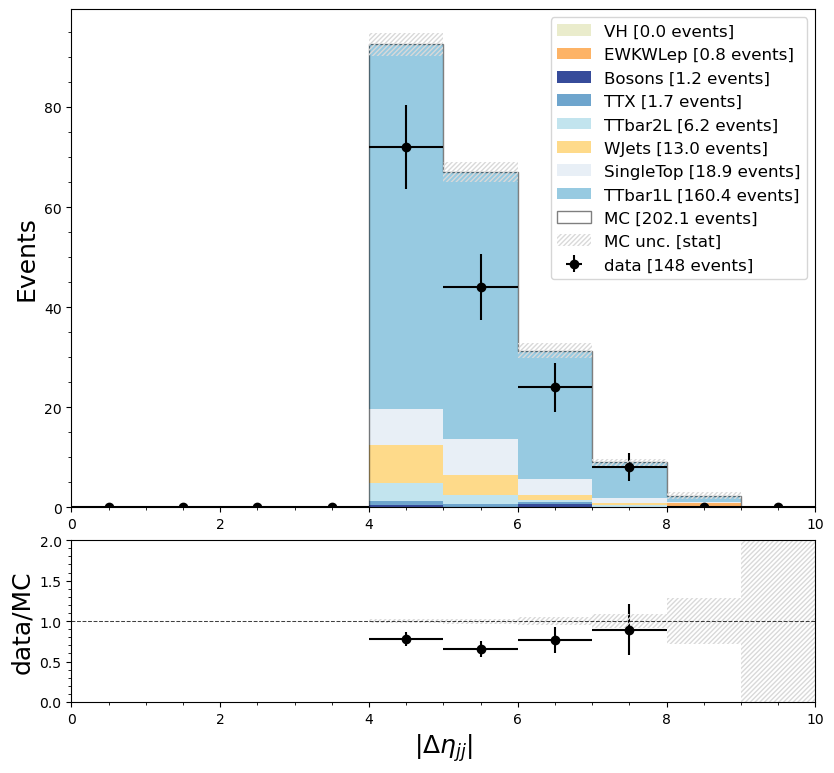

In [14]:
axes, _ = vbswh.plot_data_vs_mc(
    "deta_jj", bins=np.linspace(0,10,11), 
    selection="regionA",
    transf=abs,
    x_label=r"$|\Delta\eta_{jj}|$",
#     norm=True,
    stacked=True
)
axes.legend(fontsize=12)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/n_fatjets_data_vs_mc_regionC.png


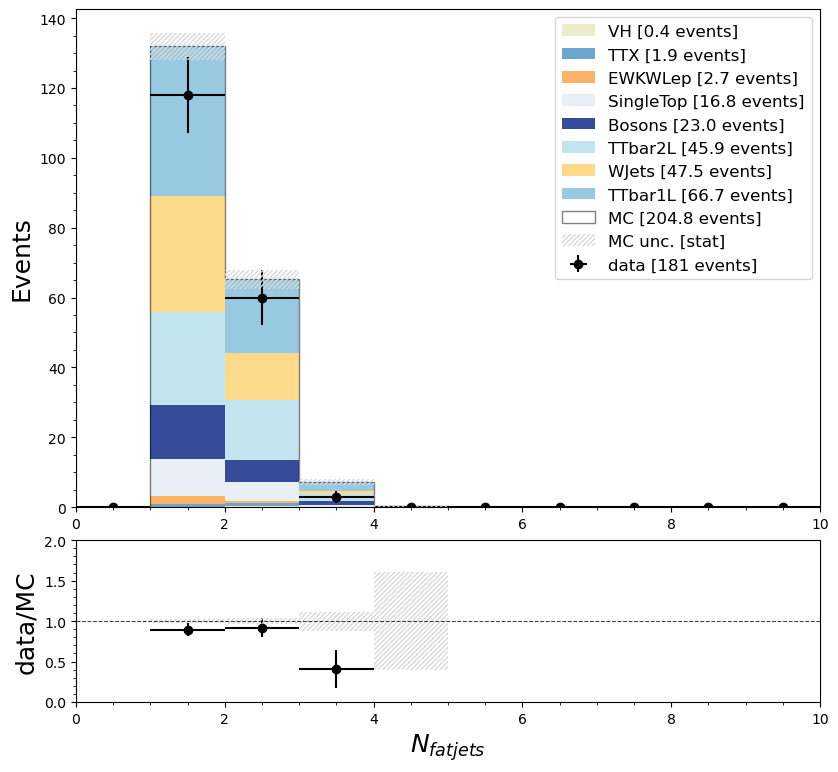

In [15]:
axes, _ = vbswh.plot_data_vs_mc(
    "n_fatjets", bins=np.linspace(0, 10, 11), 
    selection="regionC",
    x_label=r"$N_{fatjets}$",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/M_jj_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150.png


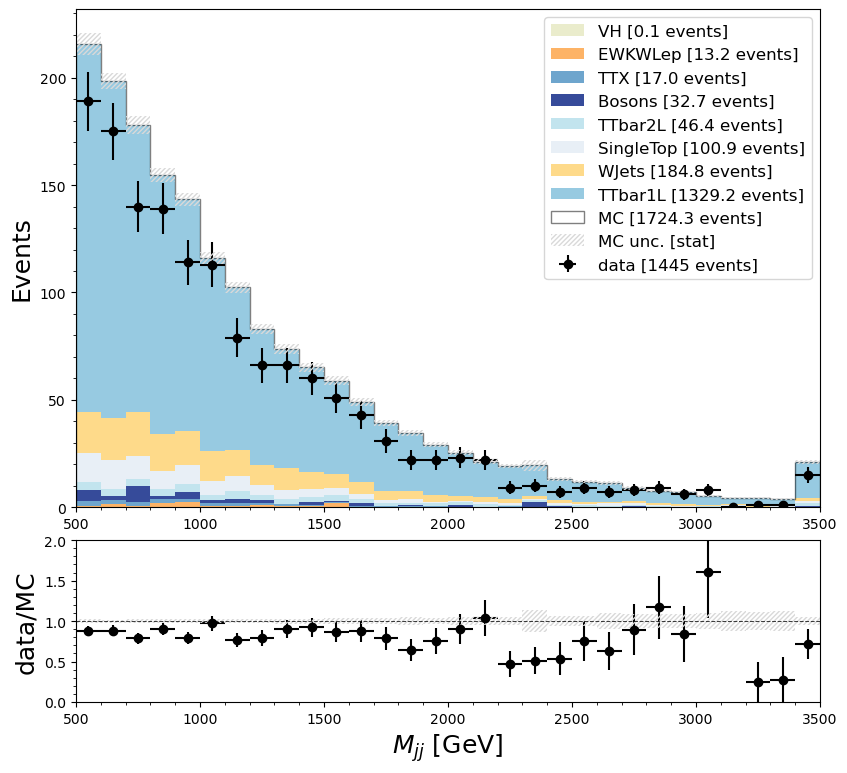

In [16]:
axes, _ = vbswh.plot_data_vs_mc(
    "M_jj", bins=np.linspace(500, 3500, 31), 
    selection="presel and hbbjet_msoftdrop >= 150",
    x_label=r"$M_{jj}$ [GeV]",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/deta_jj_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150.png


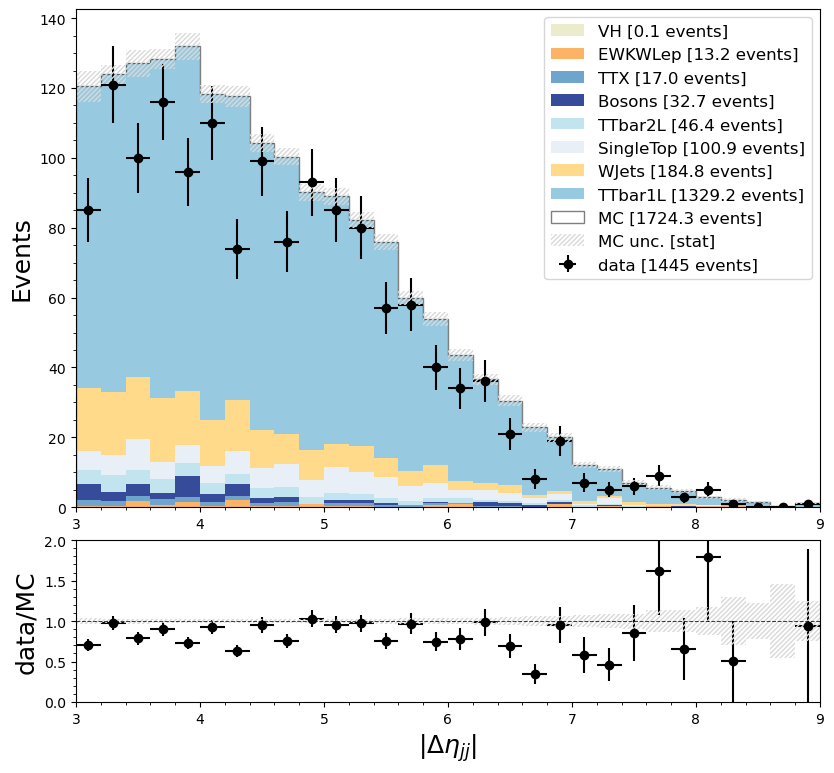

In [17]:
axes, _ = vbswh.plot_data_vs_mc(
    "deta_jj", bins=np.linspace(3,9,31), 
    selection="presel and hbbjet_msoftdrop >= 150",
    transf=abs,
    x_label=r"$|\Delta\eta_{jj}|$",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/hbbjet_score_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150.png


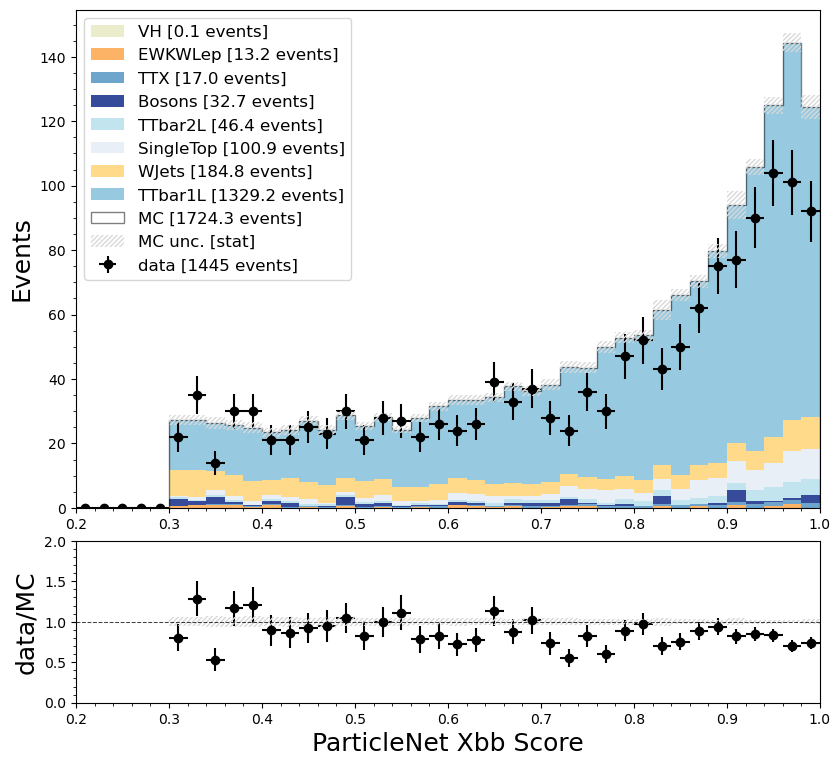

In [18]:
axes, _ = vbswh.plot_data_vs_mc(
    "hbbjet_score", bins=np.linspace(0.2, 1.0, 41), 
    selection="presel and hbbjet_msoftdrop >= 150",
    x_label=r"ParticleNet Xbb Score",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/hbbjet_msoftdrop_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150.png


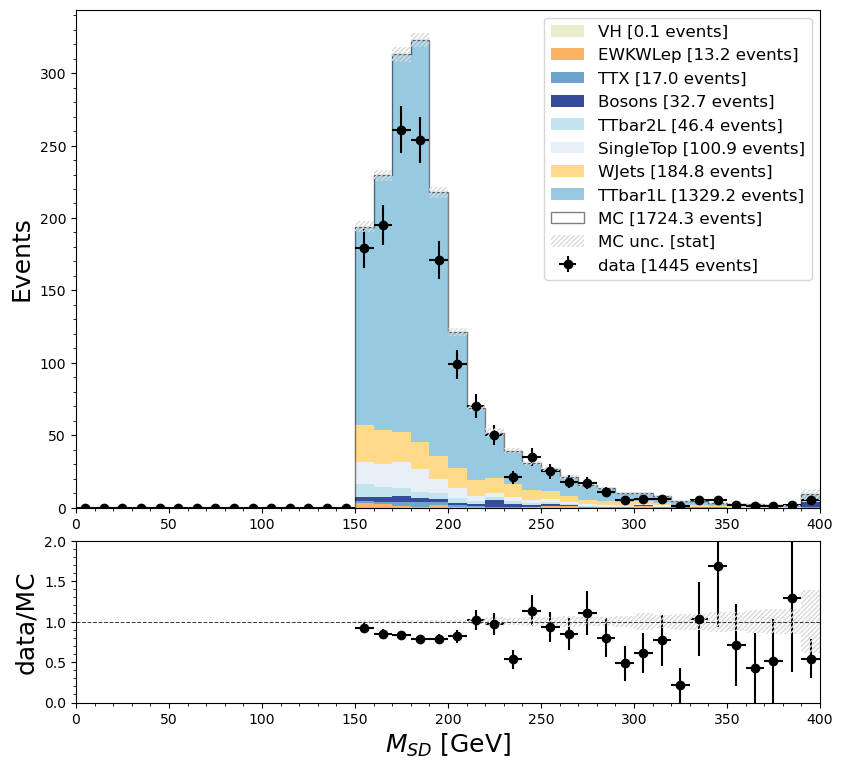

In [19]:
axes, _ = vbswh.plot_data_vs_mc(
    "hbbjet_msoftdrop", bins=np.linspace(0, 400, 41), 
    selection="presel and hbbjet_msoftdrop >= 150",
    x_label=r"$M_{SD}$ [GeV]",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/ST_data_vs_mc_presel_noDetaJJ_and_abs(deta_jj)_leq_3.png


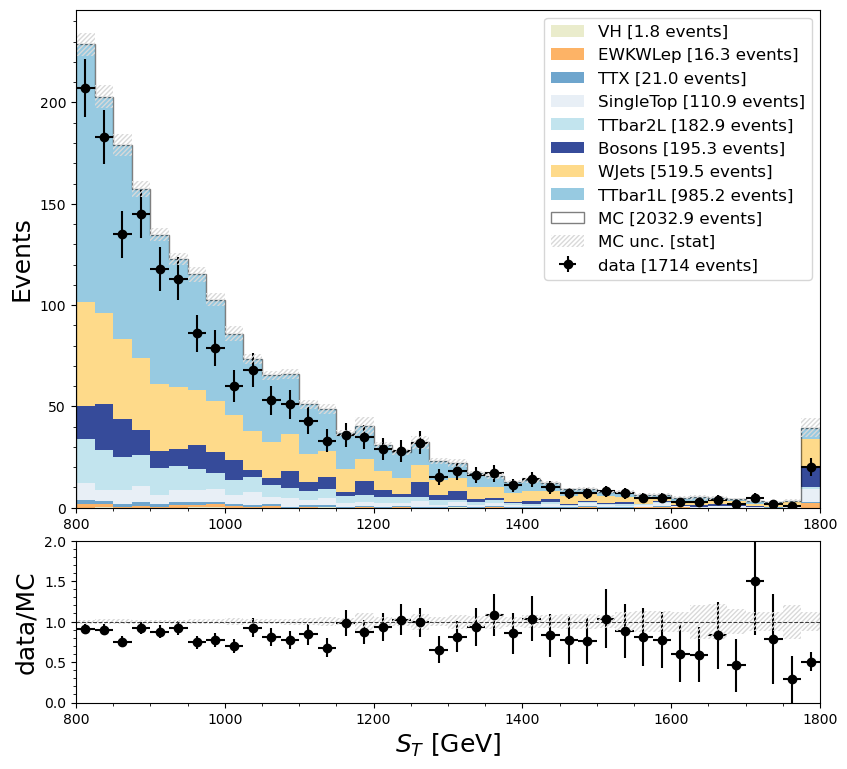

In [20]:
axes, _ = vbswh.plot_data_vs_mc(
    "ST", bins=np.linspace(800, 1800, 41), 
    selection="presel_noDetaJJ and abs(deta_jj) <= 3",
    x_label=r"$S_T$ [GeV]",
#     norm=True,
    stacked=True,
#     logy=True
)
# axes.set_yscale("log", nonpositive='clip')
# axes.set_ylim(bottom=0.1)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/ST_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150.png


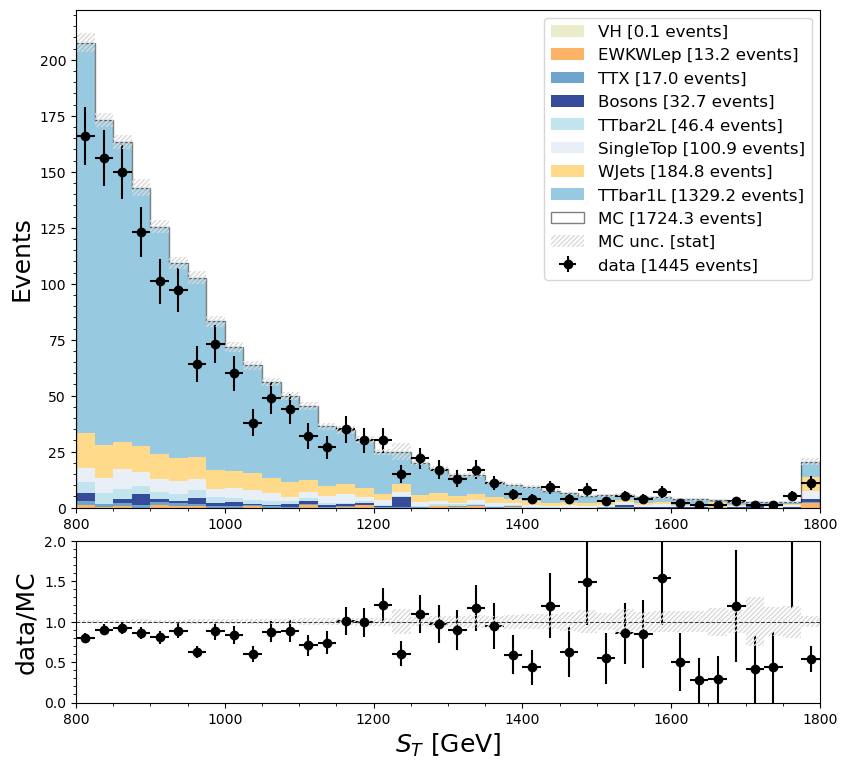

In [21]:
axes, _ = vbswh.plot_data_vs_mc(
    "ST", bins=np.linspace(800, 1800, 41), 
    selection="presel and hbbjet_msoftdrop >= 150",
    x_label=r"$S_T$ [GeV]",
#     norm=True,
    stacked=True,
#     logy=True
)
# axes.set_yscale("log", nonpositive='clip')
# axes.set_ylim(bottom=0.1)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/lep_pt_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150_and_abs(deta_jj)_gt_4_and_hbbjet_score_gt_0p9.png


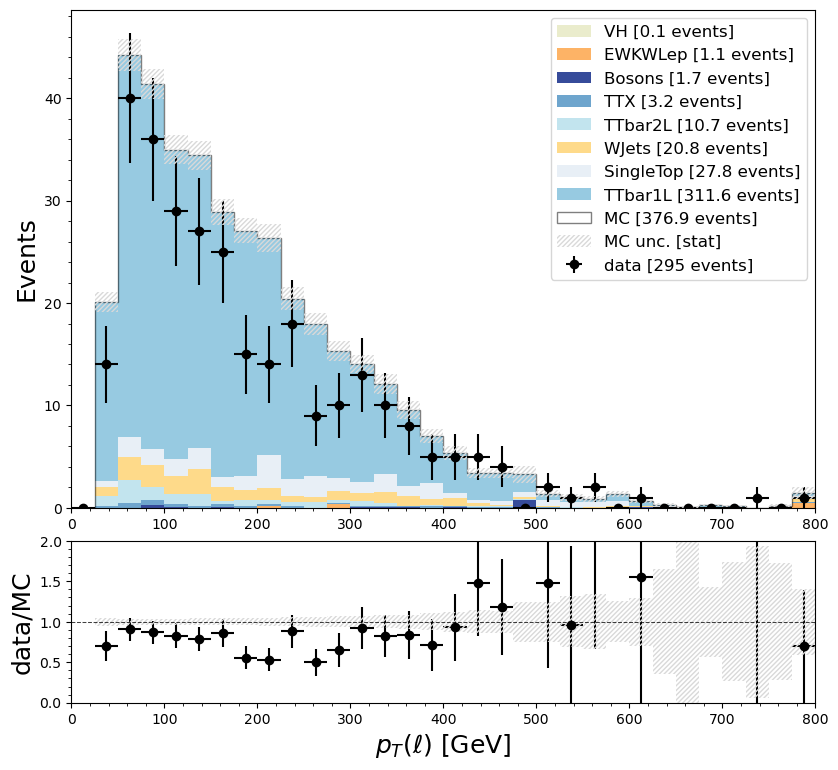

In [22]:
axes, _ = vbswh.plot_data_vs_mc(
    "lep_pt", bins=np.linspace(0, 800, 33), 
    selection="presel and hbbjet_msoftdrop >= 150 and abs(deta_jj) > 4 and hbbjet_score > 0.9",
    x_label=r"$p_T(\ell)$ [GeV]",
#     norm=True,
    stacked=True,
#     logy=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/MET_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150_and_abs(deta_jj)_gt_4_and_hbbjet_score_gt_0p9.png


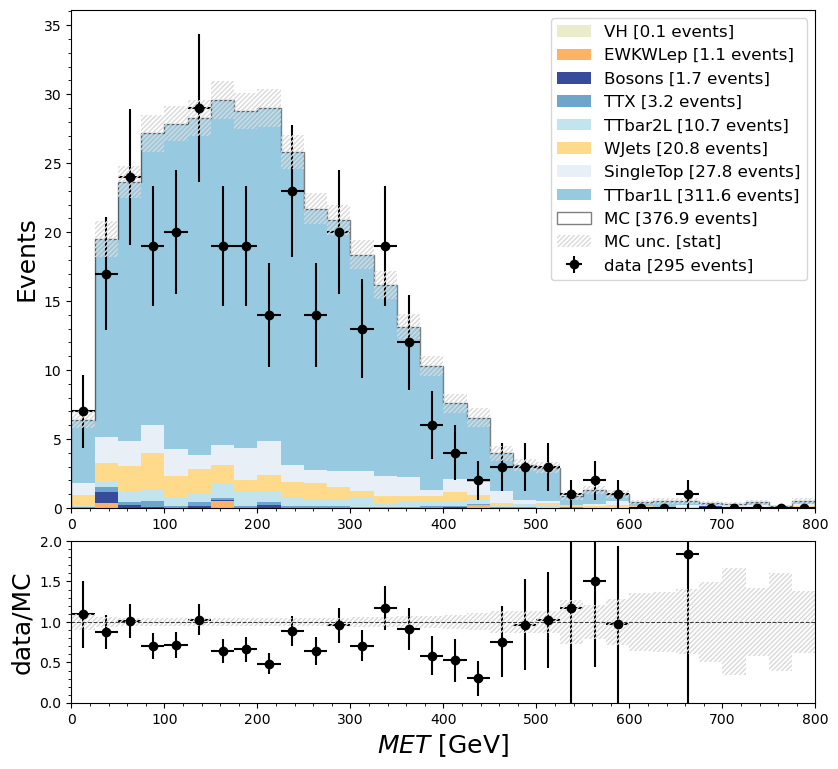

In [23]:
axes, _ = vbswh.plot_data_vs_mc(
    "MET", bins=np.linspace(0, 800, 33), 
    selection="presel and hbbjet_msoftdrop >= 150 and abs(deta_jj) > 4 and hbbjet_score > 0.9",
    x_label=r"$MET$ [GeV]",
#     norm=True,
    stacked=True,
#     logy=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/hbbjet_phi_data_vs_mc_regionA.png


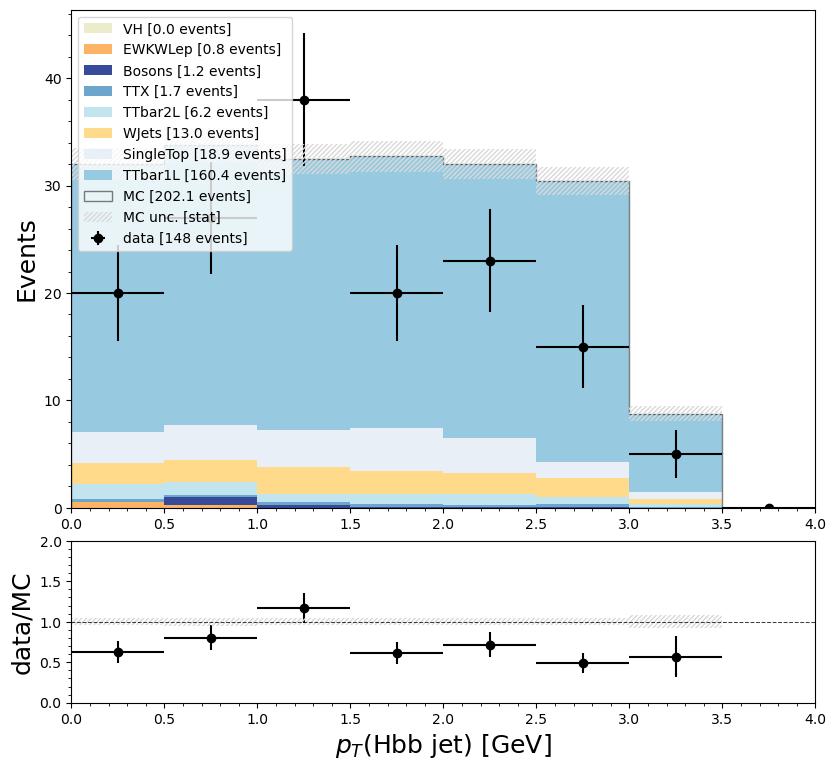

In [24]:
axes, _ = vbswh.plot_data_vs_mc(
    "hbbjet_phi", bins=np.linspace(0, 4, 9), 
    selection="regionA",
    x_label=r"$p_T($Hbb jet$)$ [GeV]",
#     norm=True,
    stacked=True,
#     logy=True
    transf=abs
)
axes.legend(loc=2)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/hbbjet_phi_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150_and_hbbjet_score_gt_0p9.png


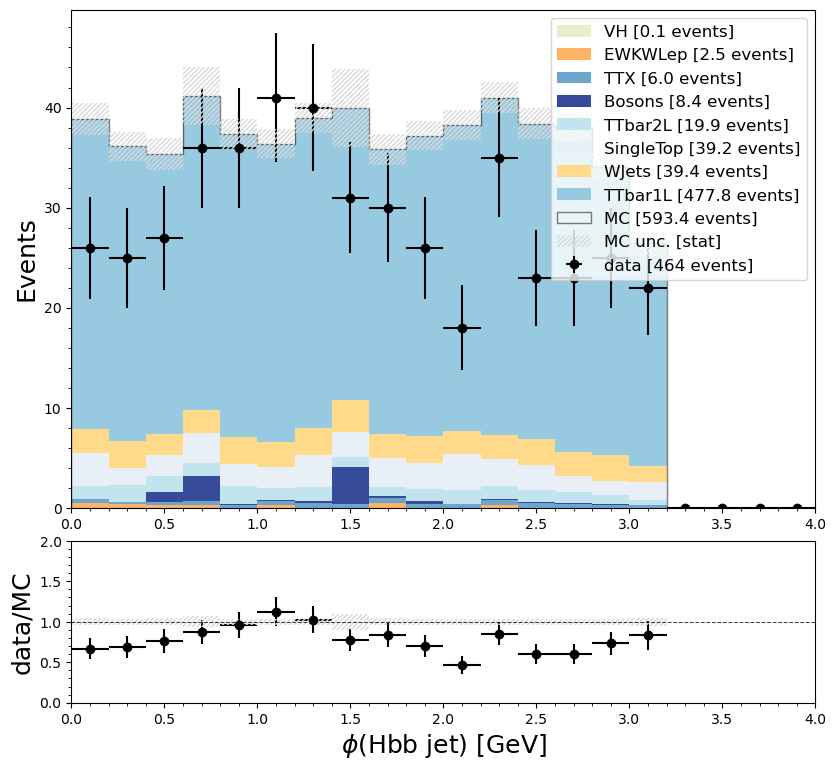

In [25]:
axes, _ = vbswh.plot_data_vs_mc(
    "hbbjet_phi", bins=np.linspace(0, 4, 21), 
    selection="presel and hbbjet_msoftdrop >= 150 and hbbjet_score > 0.9",
    x_label=r"$\phi($Hbb jet$)$ [GeV]",
#     norm=True,
    stacked=True,
#     logy=True
    transf=abs
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/hbbjet_pt_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150_and_abs(deta_jj)_gt_4_and_hbbjet_score_gt_0p9.png


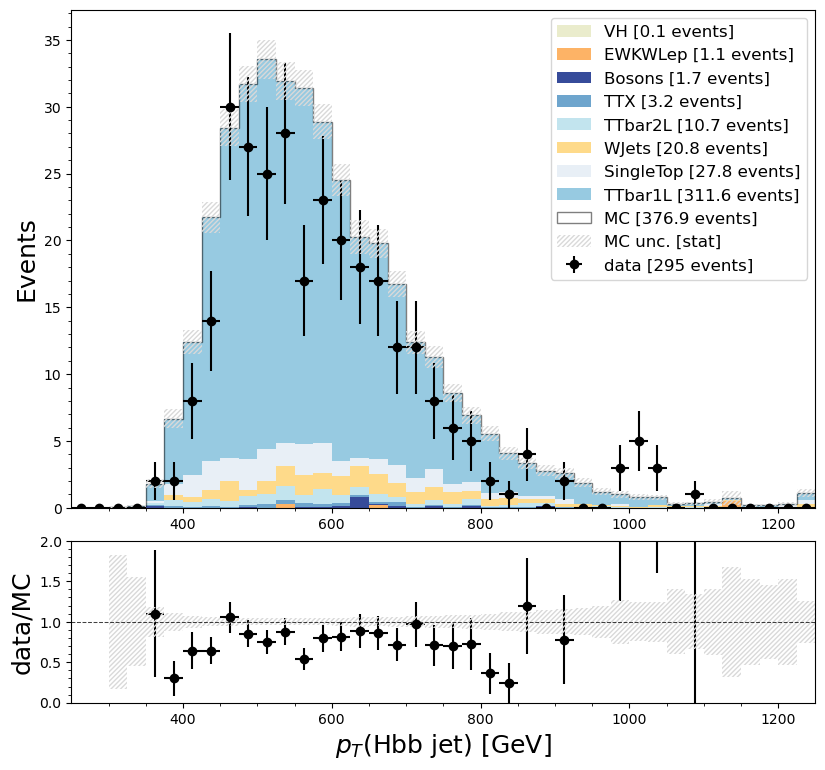

In [26]:
axes, _ = vbswh.plot_data_vs_mc(
    "hbbjet_pt", bins=np.linspace(250, 1250, 41), 
    selection="presel and hbbjet_msoftdrop >= 150 and abs(deta_jj) > 4 and hbbjet_score > 0.9",
    x_label=r"$p_T($Hbb jet$)$ [GeV]",
#     norm=True,
    stacked=True,
#     logy=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/hbbjet_score_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150_and_abs(deta_jj)_gt_4.png


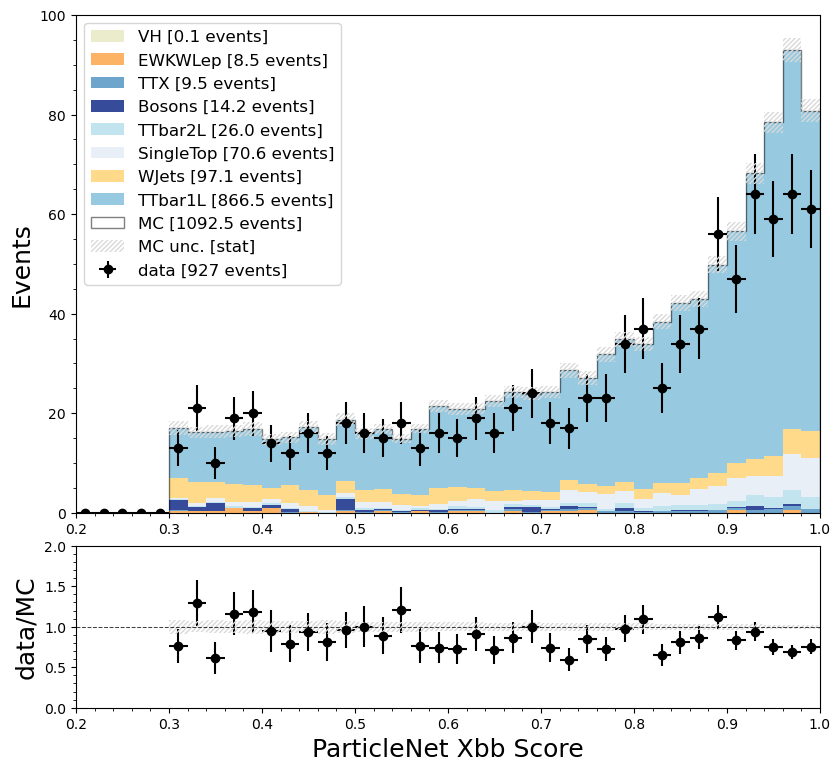

In [27]:
axes, _ = vbswh.plot_data_vs_mc(
    "hbbjet_score", bins=np.linspace(0.2, 1.0, 41), 
    selection="presel and hbbjet_msoftdrop >= 150 and abs(deta_jj) > 4",
    x_label=r"ParticleNet Xbb Score",
#     norm=True,
    stacked=True
)